In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/cluster_data1.csv')
df.shape

(150, 4)

In [36]:
missing_values = df.isnull().sum()
print(missing_values)
print(df.dtypes)

X1        0
X2        0
X3        0
X4        0
labels    0
dtype: int64
X1        float64
X2        float64
X3        float64
X4        float64
labels      int64
dtype: object


In [3]:
df[:5]

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


kmeans time taken:  10.455291986465454


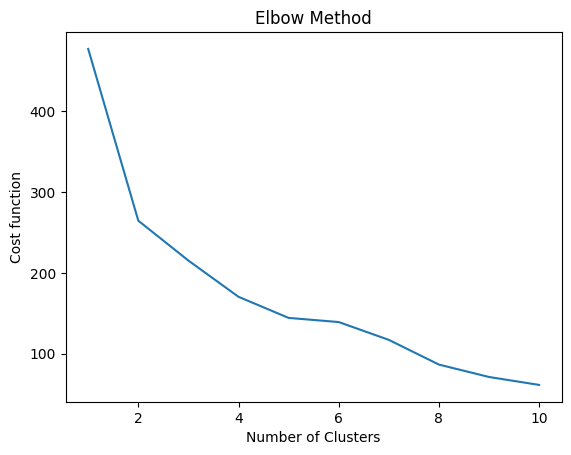

In [27]:

class KMeans:

    def __init__(self, in_clusters=2, seed=23, kmeans_plus_plus = False):
        self.in_clusters = in_clusters
        self.seed = seed
        self.kmeans_plus_plus = kmeans_plus_plus
        np.random.seed(seed)



    def initialize_clusters(self, X):
        centroids_ids = np.random.choice(X.shape[0], size=self.in_clusters, replace=False)
        centroids = []
        for i in centroids_ids:
          centroids.append(X.iloc[i].values)
        return centroids

    def intialize_clusters_k_plus_plus(self, X):

        centroids = []
        #randomly choosing the first centroid
        centroid_id = np.random.choice(X.shape[0])
        centroids.append(X.iloc[centroid_id].values)

        for _ in range(1, self.in_clusters):
            distances = np.array([min(np.linalg.norm(x - c) ** 2 for c in centroids) for x in X.values])
            # Choose the next centroid with probability proportional to its distance squared
            new_centroid = X.iloc[np.random.choice(X.shape[0], p=distances / distances.sum())].values
            centroids.append(new_centroid)

        return centroids


    def calc_distances(self, X, centroids):
        labels = np.zeros(len(X), dtype=int)
        for i, x in X.iterrows():
            min_dist = float('inf')
            for j, centroid in enumerate(centroids):
                dist = np.sqrt(np.sum((x - centroid)**2))
                if dist < min_dist:
                    min_dist = dist
                    labels[i] = j
        return labels

    def update_centroids(self, X, labels):
        centroids = np.zeros((self.in_clusters, X.shape[1]))
        for k in range(self.in_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                centroids[k] = np.mean(cluster_points, axis=0)
        return centroids

    def fit(self, X, max_iters=100):
        centroids = self.initialize_clusters(X)
        for i in range(max_iters):
            labels = self.calc_distances(X, centroids)
            new_centroids = self.update_centroids(X, labels)
            #if i == 99:

              #print("reached max iteration")
            #else:

              #print("num of iters ",i)
              #print(centroids)
              #print(new_centroids)
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids
        return centroids, labels


    def elbow_method(self, X, max_clusters=10):
        labels_all = {}
        cost_function_values = []
        for k in range(1, max_clusters + 1):
            if self.kmeans_plus_plus:
              kmeans = KMeans(in_clusters=k, kmeans_plus_plus=True)
            else:
              kmeans = KMeans(in_clusters=k)

            centroids, labels = kmeans.fit(X)
            labels_all[k] = labels
            cost_function = 0
            for i, x in X.iterrows():
                cost_function += np.sqrt(np.sum((x - centroids[labels[i]]) ** 2))
            cost_function_values.append(cost_function)
        return cost_function_values, labels_all

start_time = time.time()
kmeans = KMeans()
cost_function_values , labels_all = kmeans.elbow_method(df)
end_time = time.time()
print("kmeans time taken: ", end_time - start_time)
plt.plot(range(1, len(cost_function_values) + 1), cost_function_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost function')
plt.title('Elbow Method')
plt.show()

#print(centroids)
#print(labels)

#print(df.shape)


kmeans++ time taken:  10.234376192092896


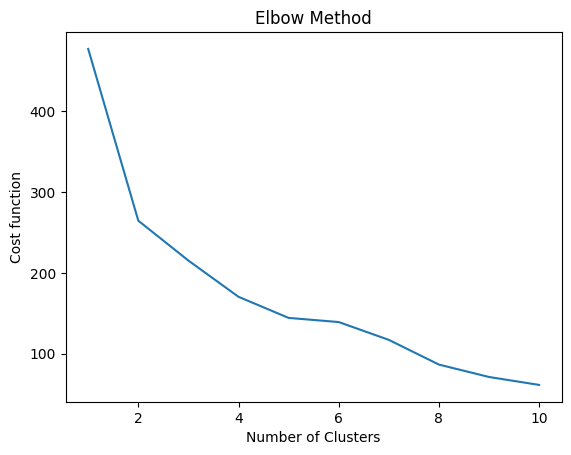

In [28]:
#kmeans++
start_time = time.time()
kmeans_kpp = KMeans(kmeans_plus_plus= True)
cost_function_values_kpp, labels_all_kpp = kmeans_kpp.elbow_method(df)
end_time = time.time()
print("kmeans++ time taken: ", end_time - start_time)
plt.plot(range(1, len(cost_function_values_kpp) + 1), cost_function_values_kpp)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost function')
plt.title('Elbow Method')
plt.show()

In [34]:
#knn

import math
from collections import Counter

import numpy as np


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def manhattan_distance(x1, x2):
    return np.sqrt(np.sum(math.abs(x1 - x2)))


class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y.values

    def predict(self, X):
        print("X_train type:", type(self.X_train))
        print("X_train shape:", self.X_train.shape)
        print("x type:", type(X))
        print("x shape:", X.shape)
        predictions = [self._predict(x) for x in X.values]
        return predictions

    def _predict(self, x):

        # compute the distance
        # distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        # get the closest k neighbors
        k_ind = np.argsort(distances)[: self.k]
        k_labels = [self.y_train[i] for i in k_ind]

        # get votes
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

In [35]:
import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df['labels'] = labels_all[3]
y = df['labels']
X = df.drop(columns=['labels'])
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23
)
print(X_test.dtypes)
print(y_test.dtype)
# custom model time
start_time = time.time()
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
acc = np.sum(predictions == y_test) / len(y_test)
end_time = time.time()
print("knn accuracy: ", acc, "with time taken: ", end_time - start_time)

# sklearn
start_time = time.time()
clf1 = KNeighborsClassifier(n_neighbors=5)
# custom model time
clf1.fit(X_train, y_train)
predictions = clf1.predict(X_test)
sk_acc = np.sum(predictions == y_test) / len(y_test)
end_time = time.time()

# sklearn model time
print("sklearn knn accuracy", sk_acc, "with time taken: ", end_time - start_time)


    X1   X2   X3   X4
0  6.7  3.0  5.0  1.7
1  6.3  2.9  5.6  1.8
2  5.6  3.0  4.5  1.5
3  7.6  3.0  6.6  2.1
4  6.0  3.4  4.5  1.6
X1    float64
X2    float64
X3    float64
X4    float64
dtype: object
int64
X_train type: <class 'numpy.ndarray'>
X_train shape: (120, 4)
x type: <class 'pandas.core.frame.DataFrame'>
x shape: (30, 4)
knn accuracy:  0.9666666666666667 with time taken:  0.006034135818481445
sklearn knn accuracy 0.9666666666666667 with time taken:  0.013615846633911133
